In [1]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('dark_background')

In [3]:
DATA_DIR = os.path.join('..', 'data')

In [4]:
os.listdir(DATA_DIR)

['data.yaml', 'README.dataset.txt', 'README.roboflow.txt', 'test', 'train']

In [5]:
IMAGES = os.listdir(os.path.join(DATA_DIR, 'train', 'images'))

In [6]:
IMAGES[:5]

['-1x-1_jpg.rf.33e987a11a51560eb735c54ab4b98cce.jpg',
 '-1x-1_jpg.rf.9c15ae68864dfa70286602a800269869.jpg',
 '-1x-1_jpg.rf.a5b0f4b2c18eeadf7af2614fe6c2ef70.jpg',
 '000166_png.rf.7a3b76285c872fd48b81f24709a91eb6.jpg',
 '000166_png.rf.8b6f269c8bb6dab841c46282a75464a4.jpg']

In [7]:
def convert_yolo_coord(box):
    x, y, w, h = list(map(float, box))
    x1 = x - w / 2
    y1 = y - h / 2
    x2 = x + w / 2
    y2 = y + h / 2

    return x1, y1, x2, y2

In [8]:
def plot_image(image, boxes):
    if len(boxes) == 0:
        return image

    for xmin, ymin, xmax, ymax in boxes:
        image = cv2.rectangle(
            image, 
            tuple(np.multiply([xmin, ymin], image.shape[0:2]).astype('int')), 
            tuple(np.multiply([xmax, ymax], image.shape[0:2]).astype('int')), 
            (0, 255, 0), 3)
    
    return image

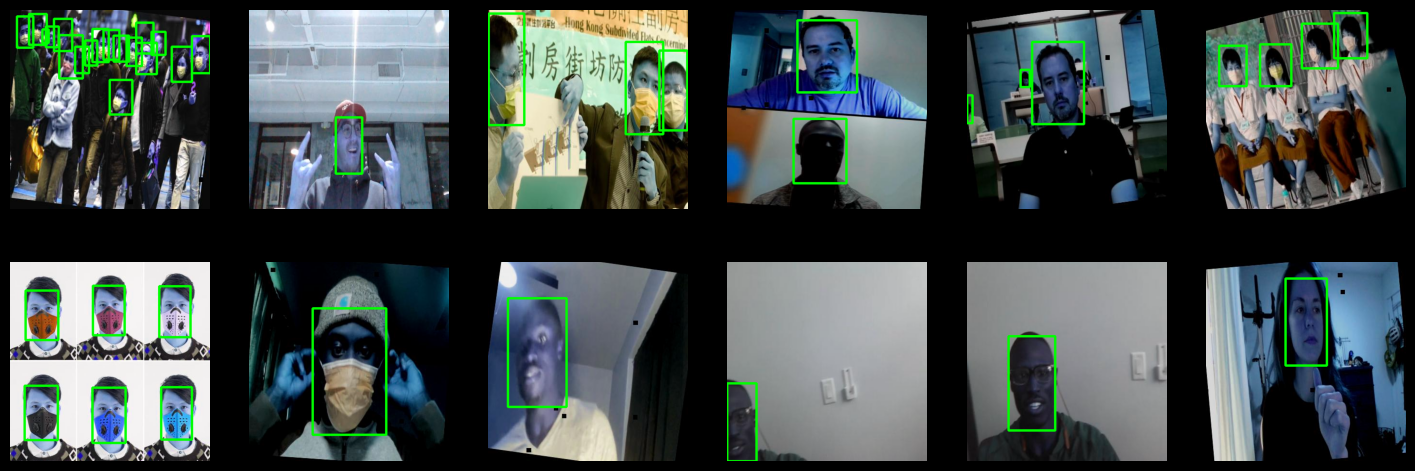

In [9]:
plt.figure(figsize=(18, 6))
for i in range(12):
    image_name = random.choice(IMAGES)
    image = cv2.imread(os.path.join(DATA_DIR, 'train', 'images', image_name))

    labels = open(os.path.join(DATA_DIR, 'train', 'labels', image_name[:-4]+'.txt'))
    boxes = []
    for line in labels:
        box = line.strip().split(' ')[1:]
        boxes.append(convert_yolo_coord(box))
        image = plot_image(image, boxes)

    plt.subplot(2, 6, i + 1)
    plt.imshow(image)
    plt.axis('off')
plt.show()